 33.468681 seconds (140.07 k allocations: 54.039 GiB, 10.26% gc time)
[10, 66]


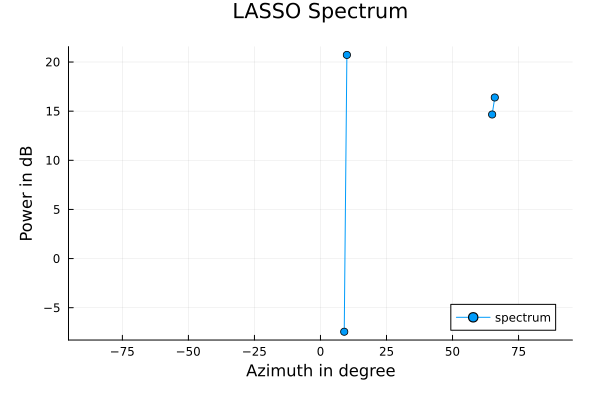

In [2]:
using ArraySignalProcessing
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Rss = I(2)
Θ = deg2rad.([10, 65])
d = length(Θ)
N = 1000
SNR = 5
Y = unconditional_signals(pa, Rss, N, SNR, Θ, fc)

θgrid = Vector(-90:90)
A = steer(pa, deg2rad.(θgrid), fc)
λ = λ_stable(length(pa), N, SNR)
@time spectrum = lasso(Y, A, λ)
Θest = find_doas(θgrid, spectrum, d)
println(Θest)

using Plots
import Measures
p1 = plot(θgrid, 10*log10.(abs.(spectrum)),marker=:dot, label="spectrum")
plot!(title="LASSO Spectrum", margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")

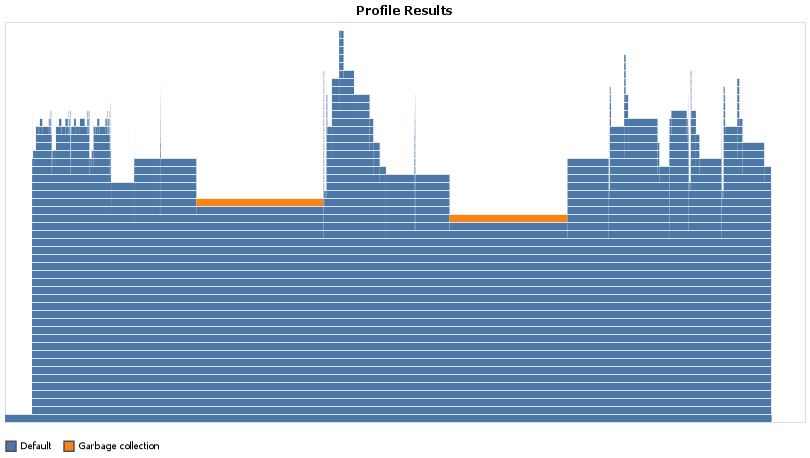

In [4]:
using ProfileVega
ProfileVega.@profview lasso(Y, A, λ)

  6.613215 seconds (17.00 M allocations: 441.790 MiB, 1.68% gc time, 3 lock conflicts)
[10, 66]


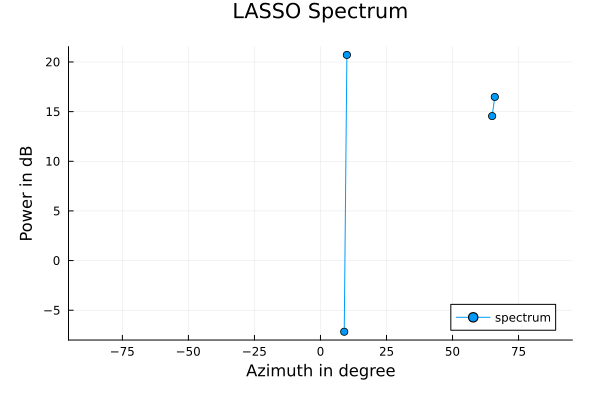

In [6]:
using CUDA
using ArraySignalProcessing
using LinearAlgebra

# test signal generation
cuY = cu(Y)
cuA = cu(A)
λ = Float32(λ)
@time @CUDA.sync spectrum = lasso(cuY, cuA, λ)
Θest = find_doas(θgrid, Array(spectrum), d)
println(Θest)

using Plots
import Measures
p1 = plot(Array(θgrid), Array(10*log10.(spectrum)),marker=:dot, label="spectrum")
plot!(title="LASSO Spectrum", margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")